#### Product sentiment classification

The problem deals with an e-commerce products review and its sentiment here the goal is to predict the sentiment of these reviews based on available historical data.

#### Evaluation Metric:
The metric used for evaluating the performance of classification model would be F1-Score.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

<b> Loading data  </b>

In [2]:
data = pd.read_csv("product_sentiment_classification.csv")

<b> Understanding data </b>

In [3]:
data.head()

,Unnamed: 0,Product_Description,Sentiment
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive
1,1,RT @mention Line for iPad 2 is longer today th...,Positive
2,2,Crazy that Apple is opening a temporary store ...,Positive
3,3,The lesson from Google One Pass: In this digit...,Positive
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive


In [4]:
data.columns = ['id', 'Product_Description', 'Sentiment']

In [5]:
pd.set_option("display.max_rows",None)

In [6]:
data.head()

,id,Product_Description,Sentiment
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive
1,1,RT @mention Line for iPad 2 is longer today th...,Positive
2,2,Crazy that Apple is opening a temporary store ...,Positive
3,3,The lesson from Google One Pass: In this digit...,Positive
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive


In [7]:
data.shape

(4164, 3)

In [8]:
data["Sentiment"].value_counts()

Positive    3765
Negetive     399
Name: Sentiment, dtype: int64

In [9]:
data["Sentiment"].value_counts(normalize=True)*100

Positive    90.417867
Negetive     9.582133
Name: Sentiment, dtype: float64

In [10]:
#The dataset has imbalance

In [11]:
data.isnull().sum()

id                     0
Product_Description    0
Sentiment              0
dtype: int64

#### Data cleaning

The data has @mentions and #tag mentions, preprocessing step involves removing these tags

In [12]:
import re
def remove_handles(text,pattern):
    handles=re.findall(pattern,text)
    for handle in handles:
        text=re.sub(handle,'',text)
    return text

# Remove twitter handles
data['clean_des'] = data.Product_Description.apply(lambda Product_Description: remove_handles(str(Product_Description),"@[\w]*"))

In [13]:
data.head(20)

,id,Product_Description,Sentiment,clean_des
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,The Web DesignerÛªs Guide to iOS (and Android...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,RT Line for iPad 2 is longer today than yeste...
2,2,Crazy that Apple is opening a temporary store ...,Positive,Crazy that Apple is opening a temporary store ...
3,3,The lesson from Google One Pass: In this digit...,Positive,The lesson from Google One Pass: In this digit...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,"RT At the panel: &quot;Your mom has an ipad, ..."
5,5,RT @mention I think my effing hubby is in line...,Negetive,RT I think my effing hubby is in line for an ...
6,6,&quot;Android users are not iPhone users. (The...,Positive,&quot;Android users are not iPhone users. (The...
7,7,Google to Launch New Social Network Called Cir...,Positive,Google to Launch New Social Network Called Cir...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,Welcome! Enjoy #Sxsw and ride anywhere in Au...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,"RT Apple plans to Keep Austin Wired, opening ..."


In [14]:
def remove_specialchars(text,pattern):
    text=re.sub(pattern,' ',text)
    return text

# Remove special characters,numbers and punctuations except " # " and " ' "
data['clean_des'] = data.clean_des.apply(lambda clean_des: remove_specialchars(str(clean_des),"[^a-zA-Z'#]"))

In [15]:
data.head(20)

,id,Product_Description,Sentiment,clean_des
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,The Web Designer s Guide to iOS and Android...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,RT Line for iPad is longer today than yeste...
2,2,Crazy that Apple is opening a temporary store ...,Positive,Crazy that Apple is opening a temporary store ...
3,3,The lesson from Google One Pass: In this digit...,Positive,The lesson from Google One Pass In this digit...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,RT At the panel quot Your mom has an ipad ...
5,5,RT @mention I think my effing hubby is in line...,Negetive,RT I think my effing hubby is in line for an ...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot Android users are not iPhone users The...
7,7,Google to Launch New Social Network Called Cir...,Positive,Google to Launch New Social Network Called Cir...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,Welcome Enjoy #Sxsw and ride anywhere in Au...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,RT Apple plans to Keep Austin Wired opening ...


#### Data preprocessing

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

In [17]:
# Step - a: Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
data['clean_des'] = [sentence.lower() for sentence in data['clean_des']]

# Step - b: Tokenization and Remove Stop words, Non-alphabetic and perfom Word Lemmatization.
stop_words = list(STOP_WORDS)
for index, entry in enumerate(data['clean_des']):
    tokens = [token.lemma_ for token in nlp(entry) if ((str(token) not in stop_words) and (token.is_alpha == True))]
    clean_text = " ".join(tokens)
    data.loc[index, 'clean_text'] = clean_text

In [18]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer s guide io android app today m li...
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,rt line ipad long today yesterday sxsw get lin...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,rt panel quot mom ipad design boomer quot sxsw
5,5,RT @mention I think my effing hubby is in line...,Negetive,rt i think my effing hubby is in line for an ...,rt think eff hubby line ipad point line wife n...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,Positive,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy sxsw ride austin dwnld groundlin...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,rt apple plans to keep austin wired opening ...,rt apple plan austin wire open pop apple store...


In [19]:
# remove short words (length < 2)
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [20]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer guide android app today link sxsw
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,line ipad long today yesterday sxsw get line t...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot sxsw
5,5,RT @mention I think my effing hubby is in line...,Negetive,rt i think my effing hubby is in line for an ...,think eff hubby line ipad point line wife numb...
6,6,&quot;Android users are not iPhone users. (The...,Positive,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,Positive,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,Positive,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy sxsw ride austin dwnld groundlin...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",Positive,rt apple plans to keep austin wired opening ...,apple plan austin wire open pop apple store sx...


In [24]:
data.dtypes

id                        int64
Product_Description      object
Sentiment                object
clean_des                object
clean_text             category
dtype: object

In [29]:
data["clean_text"] = data["clean_text"].astype("category")
data["Sentiment"] = data["Sentiment"].astype("category")

In [30]:
data.dtypes

id                        int64
Product_Description      object
Sentiment              category
clean_des                object
clean_text             category
dtype: object

#### Visualizing most frequent words using WordCloud

In [81]:
#!pip install wordcloud

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
Positive_review = data[data["Sentiment"] == "Positive"]["clean_text"]
Negetive_review = data[data["Sentiment"] == "Negetive"]["clean_text"]

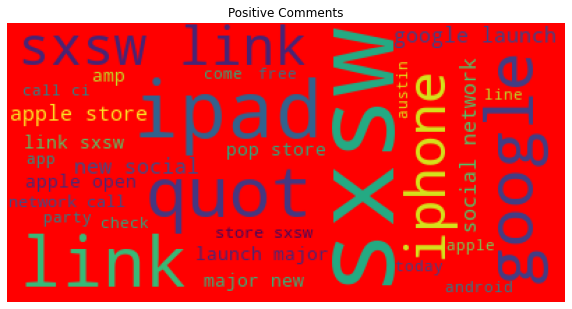

In [33]:
wordcloud = WordCloud(max_font_size=80, max_words=30, background_color="red").generate(str(Positive_review))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Comments")
plt.show()

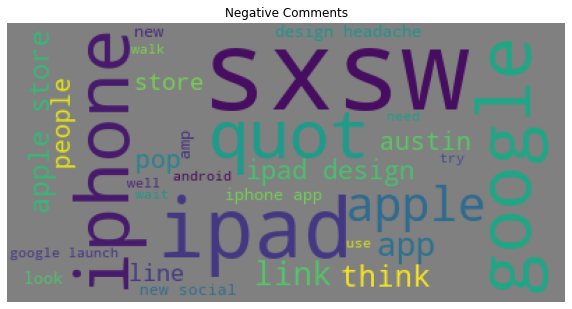

In [34]:
wordcloud = WordCloud(max_font_size=80, max_words=30, background_color="gray").generate(str(Negetive_review))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative Comments")
plt.show()

#### label encoding the target variable

In [35]:
data.head()

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,Positive,the web designer s guide to ios and android...,web designer guide android app today link sxsw
1,1,RT @mention Line for iPad 2 is longer today th...,Positive,rt line for ipad is longer today than yeste...,line ipad long today yesterday sxsw get line t...
2,2,Crazy that Apple is opening a temporary store ...,Positive,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,Positive,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,Positive,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot sxsw


In [36]:
#label encoding the target variable
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
le.fit(data["Sentiment"])
data["Sentiment"] = le.transform(data["Sentiment"])

In [37]:
data.head(20)

,id,Product_Description,Sentiment,clean_des,clean_text
0,0,The Web DesignerÛªs Guide to iOS (and Android...,1,the web designer s guide to ios and android...,web designer guide android app today link sxsw
1,1,RT @mention Line for iPad 2 is longer today th...,1,rt line for ipad is longer today than yeste...,line ipad long today yesterday sxsw get line t...
2,2,Crazy that Apple is opening a temporary store ...,1,crazy that apple is opening a temporary store ...,crazy apple open temporary store austin tomorr...
3,3,The lesson from Google One Pass: In this digit...,1,the lesson from google one pass in this digit...,lesson google pass digital environment user wa...
4,4,RT @mention At the panel: &quot;Your mom has a...,1,rt at the panel quot your mom has an ipad ...,panel quot mom ipad design boomer quot sxsw
5,5,RT @mention I think my effing hubby is in line...,0,rt i think my effing hubby is in line for an ...,think eff hubby line ipad point line wife numb...
6,6,&quot;Android users are not iPhone users. (The...,1,quot android users are not iphone users the...,quot android user iphone user use option menu ...
7,7,Google to Launch New Social Network Called Cir...,1,google to launch new social network called cir...,google launch new social network call circle p...
8,8,@mention Welcome! Enjoy #Sxsw and ride anywhe...,1,welcome enjoy #sxsw and ride anywhere in au...,welcome enjoy sxsw ride austin dwnld groundlin...
9,9,"RT @mention Apple plans to Keep Austin Wired, ...",1,rt apple plans to keep austin wired opening ...,apple plan austin wire open pop apple store sx...


In [38]:
#Sentiment "1" means "Positive"
#Sentiment "0" means "Negative"

In [40]:
def max_length(tweets):
    max_length=0
    for tweet in tweets:
        if max_length < len(tweet):
            max_length = len(tweet)
    return max_length

max_length=max_length(data.clean_text)
print("tweet with max length has a length of:", max_length)

tweet with max length has a length of: 127


In [58]:

import tensorflow as tf

from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Embedding, Dense, Flatten 
from tensorflow.keras.layers import LSTM, Dropout, SimpleRNN, Bidirectional

from sklearn import metrics
from keras.layers import Dense, Input, Dropout, LSTM, Bidirectional
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint
from keras import regularizers

In [44]:
# Downloading pre-trained 100-dimensional glove embeddings

embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [46]:
MAX_NUM_WORDS = 40000 # Vocabulary size
MAX_SEQUENCE_LENGTH = 127 # Number of time steps (at each time step one word/word vector is given as input)
embedding_size = 100 

In [47]:
# vectorize the text samples into a 2D tensor

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(data.clean_text)
sequences = tokenizer.texts_to_sequences(data.clean_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data1 = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels=np.asarray(data.Sentiment)
print('Shape of data tensor:', data1.shape)
print('Shape of label tensor:', labels.shape)

Found 4855 unique tokens.
Shape of data tensor: (4164, 127)
Shape of label tensor: (4164,)


In [48]:
indices = np.arange(data1.shape[0])
np.random.shuffle(indices)
data1 = data1[indices]
labels = labels[indices]
VALIDATION_SPLIT=0.2
num_validation_samples = int(VALIDATION_SPLIT * data1.shape[0])

X_train = data1[:-num_validation_samples]
y_train_act = labels[:-num_validation_samples]
X_test = data1[-num_validation_samples:]
y_test_act = labels[-num_validation_samples:]

print(X_train.shape)
print(y_train_act.shape)
print(X_test.shape)
print(y_test_act.shape)

(3332, 127)
(3332,)
(832, 127)
(832,)


##### Converting target from single value to list of 2 values (as it is binary)

In [49]:
y_train = y_train_act.copy()
y_test = y_test_act.copy()

In [50]:
arr = y_train  # take sentiment column in df as array
y_train = np.zeros((arr.size, arr.max()+1))  # initialize empty (all zero) label array
y_train[np.arange(arr.size), arr] = 1  # add ones in indices where we have a value
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [51]:
arr = y_test  # take sentiment column in df as array
y_test = np.zeros((arr.size, arr.max()+1))  # initialize empty (all zero) label array
y_test[np.arange(arr.size), arr] = 1  # add ones in indices where we have a value
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

#### Creating embed layer

In [53]:
num_words = min(MAX_NUM_WORDS, (len(word_index)+1))
embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    else:
        continue

In [54]:
print(embedding_matrix.shape)

(4856, 100)


In [55]:
from keras.layers import Embedding

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            embedding_size,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

#### Creating all metrics in a Dataframe

In [56]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#### Simple RNN

In [57]:
input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
hl1_embedded = embedding_layer(input)
h12_rnn = SimpleRNN(100)(hl1_embedded)
h13_dropout = Dropout(0.2)(h12_rnn)
output = Dense(2, activation='softmax')(h13_dropout)

model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 127)]             0         
                                                                 
 embedding (Embedding)       (None, 127, 100)          485600    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 505,902
Trainable params: 505,902
Non-trainable params: 0
_________________________________________________________________


In [66]:
mc = ModelCheckpoint("weights.{epoch:02d}-{val_acc:.2f}.hdf5", monitor='val_loss',mode='min', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, epochs=30,callbacks=[mc,es],
          validation_data=(X_test, y_test),
          batch_size=128).history

Epoch 1/30
27/27 [==============================] - 5s 138ms/step - loss: 0.2981 - acc: 0.9004 - val_loss: 0.2631 - val_acc: 0.9195
Epoch 2/30
27/27 [==============================] - 3s 105ms/step - loss: 0.2773 - acc: 0.9019 - val_loss: 0.3006 - val_acc: 0.9099
Epoch 3/30
27/27 [==============================] - 3s 114ms/step - loss: 0.3498 - acc: 0.8764 - val_loss: 0.2907 - val_acc: 0.9135
Epoch 4/30
27/27 [==============================] - 3s 126ms/step - loss: 0.2733 - acc: 0.9031 - val_loss: 0.2761 - val_acc: 0.9171
Epoch 5/30
27/27 [==============================] - 3s 121ms/step - loss: 0.2529 - acc: 0.9076 - val_loss: 0.2718 - val_acc: 0.9135
Epoch 6/30
27/27 [==============================] - 3s 121ms/step - loss: 0.2322 - acc: 0.9196 - val_loss: 0.2670 - val_acc: 0.9062
Epoch 7/30
27/27 [==============================] - 3s 109ms/step - loss: 0.2102 - acc: 0.9277 - val_loss: 0.2585 - val_acc: 0.9159
Epoch 8/30
27/27 [==============================] - 3s 128ms/step - loss: 0.

{'loss': [0.29809123277664185,
  0.27726423740386963,
  0.34978625178337097,
  0.2732713520526886,
  0.25289055705070496,
  0.23222392797470093,
  0.21022243797779083,
  0.1849624365568161,
  0.15590959787368774,
  0.13510926067829132,
  0.1087256595492363,
  0.08571508526802063,
  0.06964266300201416,
  0.09926408529281616,
  0.06139027699828148,
  0.050915077328681946,
  0.04197348654270172,
  0.037697501480579376,
  0.031490348279476166,
  0.029873542487621307],
 'acc': [0.9003601670265198,
  0.901860773563385,
  0.8763505220413208,
  0.9030612111091614,
  0.9075630307197571,
  0.9195678234100342,
  0.9276710748672485,
  0.9339736104011536,
  0.9501800537109375,
  0.958583414554596,
  0.9669867753982544,
  0.9732893109321594,
  0.9783913493156433,
  0.9669867753982544,
  0.9810924530029297,
  0.9846938848495483,
  0.9861944913864136,
  0.9876950979232788,
  0.9894958138465881,
  0.9894958138465881],
 'val_loss': [0.2630770802497864,
  0.30060911178588867,
  0.2906610667705536,
  0.2

In [67]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [70]:
y_pred_train = np.argmax(y_pred_train, axis=-1)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [71]:
y_pred_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
scores = get_metrics(y_train_act,y_pred_train,y_test_act,y_pred_test,"Simple RNN",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Simple RNN,0.991897,0.996999,0.994016,0.995505,0.905048,0.94517,0.95138,0.948265


#### LSTM

In [75]:
input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
hl1_embedded = embedding_layer(input)
h12_lstm = LSTM(100)(hl1_embedded)
h13_dropout = Dropout(0.2)(h12_lstm)
output = Dense(2, activation='softmax')(h13_dropout)

model1 = Model(input, output)
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 127)]             0         
                                                                 
 embedding (Embedding)       (None, 127, 100)          485600    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 566,202
Trainable params: 566,202
Non-trainable params: 0
_________________________________________________________________


In [76]:
mc = ModelCheckpoint("weights.{epoch:02d}-{val_acc:.2f}.hdf5", monitor='val_loss',mode='min', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model1.fit(X_train, y_train, epochs=30,callbacks=[mc,es],
          validation_data=(X_test, y_test),
          batch_size=128).history

Epoch 1/30
27/27 [==============================] - 11s 324ms/step - loss: 0.3602 - acc: 0.8929 - val_loss: 0.2729 - val_acc: 0.9207
Epoch 2/30
27/27 [==============================] - 8s 308ms/step - loss: 0.2726 - acc: 0.9001 - val_loss: 0.2460 - val_acc: 0.9171
Epoch 3/30
27/27 [==============================] - 8s 309ms/step - loss: 0.2172 - acc: 0.9127 - val_loss: 0.2195 - val_acc: 0.9255
Epoch 4/30
27/27 [==============================] - 8s 307ms/step - loss: 0.1567 - acc: 0.9415 - val_loss: 0.2484 - val_acc: 0.8942
Epoch 5/30
27/27 [==============================] - 8s 293ms/step - loss: 0.1200 - acc: 0.9613 - val_loss: 0.2404 - val_acc: 0.9026
Epoch 6/30
27/27 [==============================] - 9s 344ms/step - loss: 0.0890 - acc: 0.9697 - val_loss: 0.2396 - val_acc: 0.9123
Epoch 7/30
27/27 [==============================] - 9s 330ms/step - loss: 0.0673 - acc: 0.9772 - val_loss: 0.2574 - val_acc: 0.9255
Epoch 8/30
27/27 [==============================] - 8s 302ms/step - loss: 0

{'loss': [0.3602374196052551,
  0.2726143002510071,
  0.21723267436027527,
  0.1567191183567047,
  0.11999458819627762,
  0.08897081017494202,
  0.06731913983821869,
  0.05984385311603546,
  0.04691268131136894,
  0.062009040266275406,
  0.04162008687853813,
  0.03609665110707283,
  0.03596643730998039],
 'acc': [0.8928571343421936,
  0.9000599980354309,
  0.912665069103241,
  0.941476583480835,
  0.9612845182418823,
  0.9696878790855408,
  0.9771908521652222,
  0.9804921746253967,
  0.9846938848495483,
  0.9780912399291992,
  0.9840936660766602,
  0.9849939942359924,
  0.9852941036224365],
 'val_loss': [0.27287614345550537,
  0.24602772295475006,
  0.2194841504096985,
  0.2484348714351654,
  0.24044273793697357,
  0.23959605395793915,
  0.25739043951034546,
  0.2821410000324249,
  0.3131769895553589,
  0.31509822607040405,
  0.30878737568855286,
  0.3247554898262024,
  0.34307152032852173],
 'val_acc': [0.9206730723381042,
  0.917067289352417,
  0.9254807829856873,
  0.894230782985687

In [77]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [78]:
y_pred_train = np.argmax(y_pred_train, axis=-1)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [79]:
scores = get_metrics(y_train_act,y_pred_train,y_test_act,y_pred_test,"LSTM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Simple RNN,0.991897,0.996999,0.994016,0.995505,0.905048,0.945170,0.951380,0.948265
1,LSTM,0.987095,0.996332,0.989404,0.992856,0.913462,0.954308,0.951823,0.953064


### Bidirectional LSTM
    * Bidirectional recurrent neural networks(RNN) are just putting two independent RNNs together. 
    * The input sequence is fed in normal time order for one network, and in reverse time order for another. 
    * The outputs of the two networks are usually concatenated at each time step.
    * This structure allows the networks to have both backward and forward information about the sequence at every  time step.

In [84]:
input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
hl1_embedded = embedding_layer(input)
h12_lstm = Bidirectional(LSTM(100))(hl1_embedded)
h13_dropout = Dropout(0.2)(h12_lstm)
output = Dense(2, activation='softmax')(h13_dropout)

model2 = Model(input, output)
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 127)]             0         
                                                                 
 embedding (Embedding)       (None, 127, 100)          485600    
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 402       
                                                                 
Total params: 646,802
Trainable params: 646,802
Non-trainable params: 0
_____________________________________________________

In [85]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [86]:
y_pred_train = np.argmax(y_pred_train, axis=-1)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [87]:
scores = get_metrics(y_train_act,y_pred_train,y_test_act,y_pred_test,"Bidirectional LSTM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Simple RNN,0.991897,0.996999,0.994016,0.995505,0.905048,0.945170,0.951380,0.948265
1,LSTM,0.987095,0.996332,0.989404,0.992856,0.913462,0.954308,0.951823,0.953064
2,Bidirectional LSTM,0.255702,0.210070,0.850202,0.336898,0.247596,0.203655,0.906977,0.332623
